In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,VotingClassifier;
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import  r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.decomposition import PCA
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1af7Z3icx_nHKy5-0g37EUtLp-hXqiQP4')
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

tính tỉ lệ % các dữ liệu bị thiếu cho từng feature

In [6]:
(df.isnull().sum()/len(df))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

do missing value khá nhiều nên xóa hết đi không phải cách tối ưu. Fill dữ liệu float với giá trị mean và dữ liệu object với giá trị mode

In [7]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [8]:
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [9]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

map feature raintomorrow và raintoday thành kiểu binary. Yes = 1 và No = 0

In [10]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

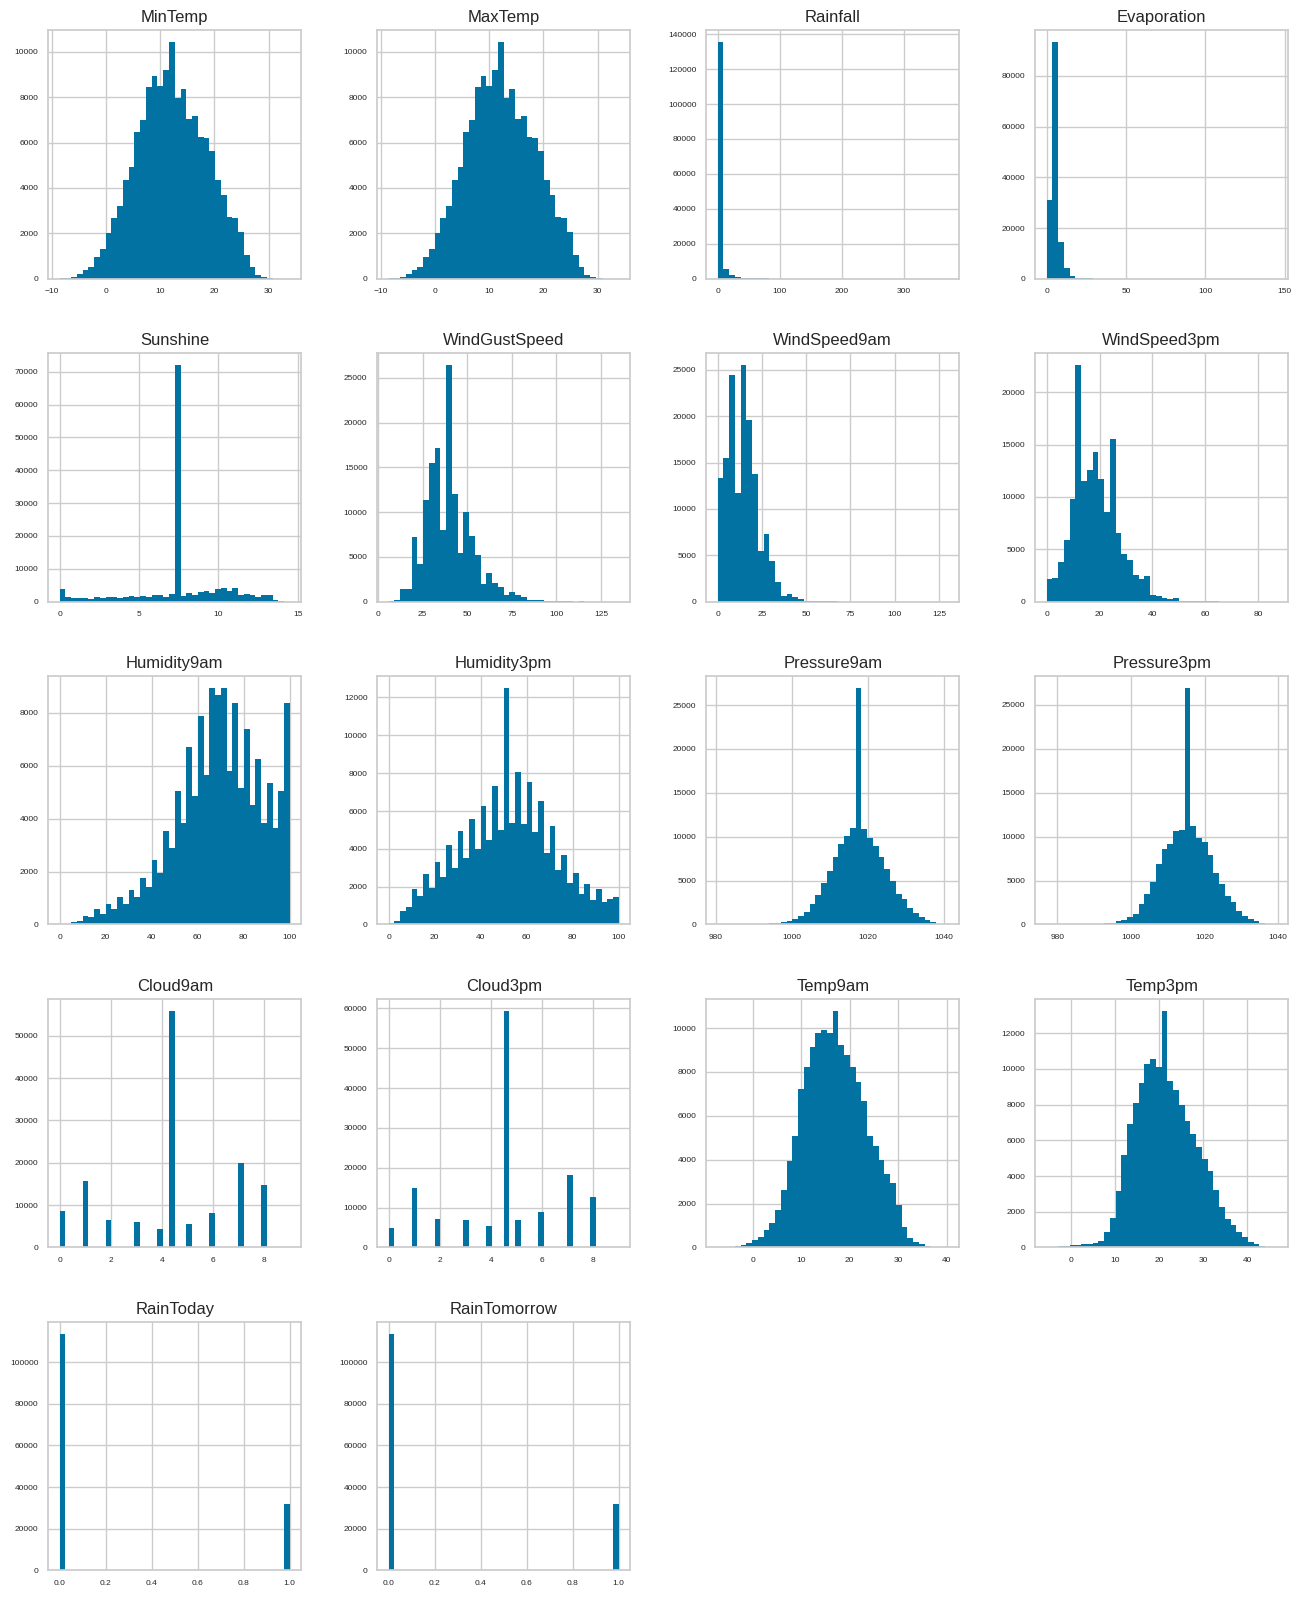

In [15]:
df.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6);

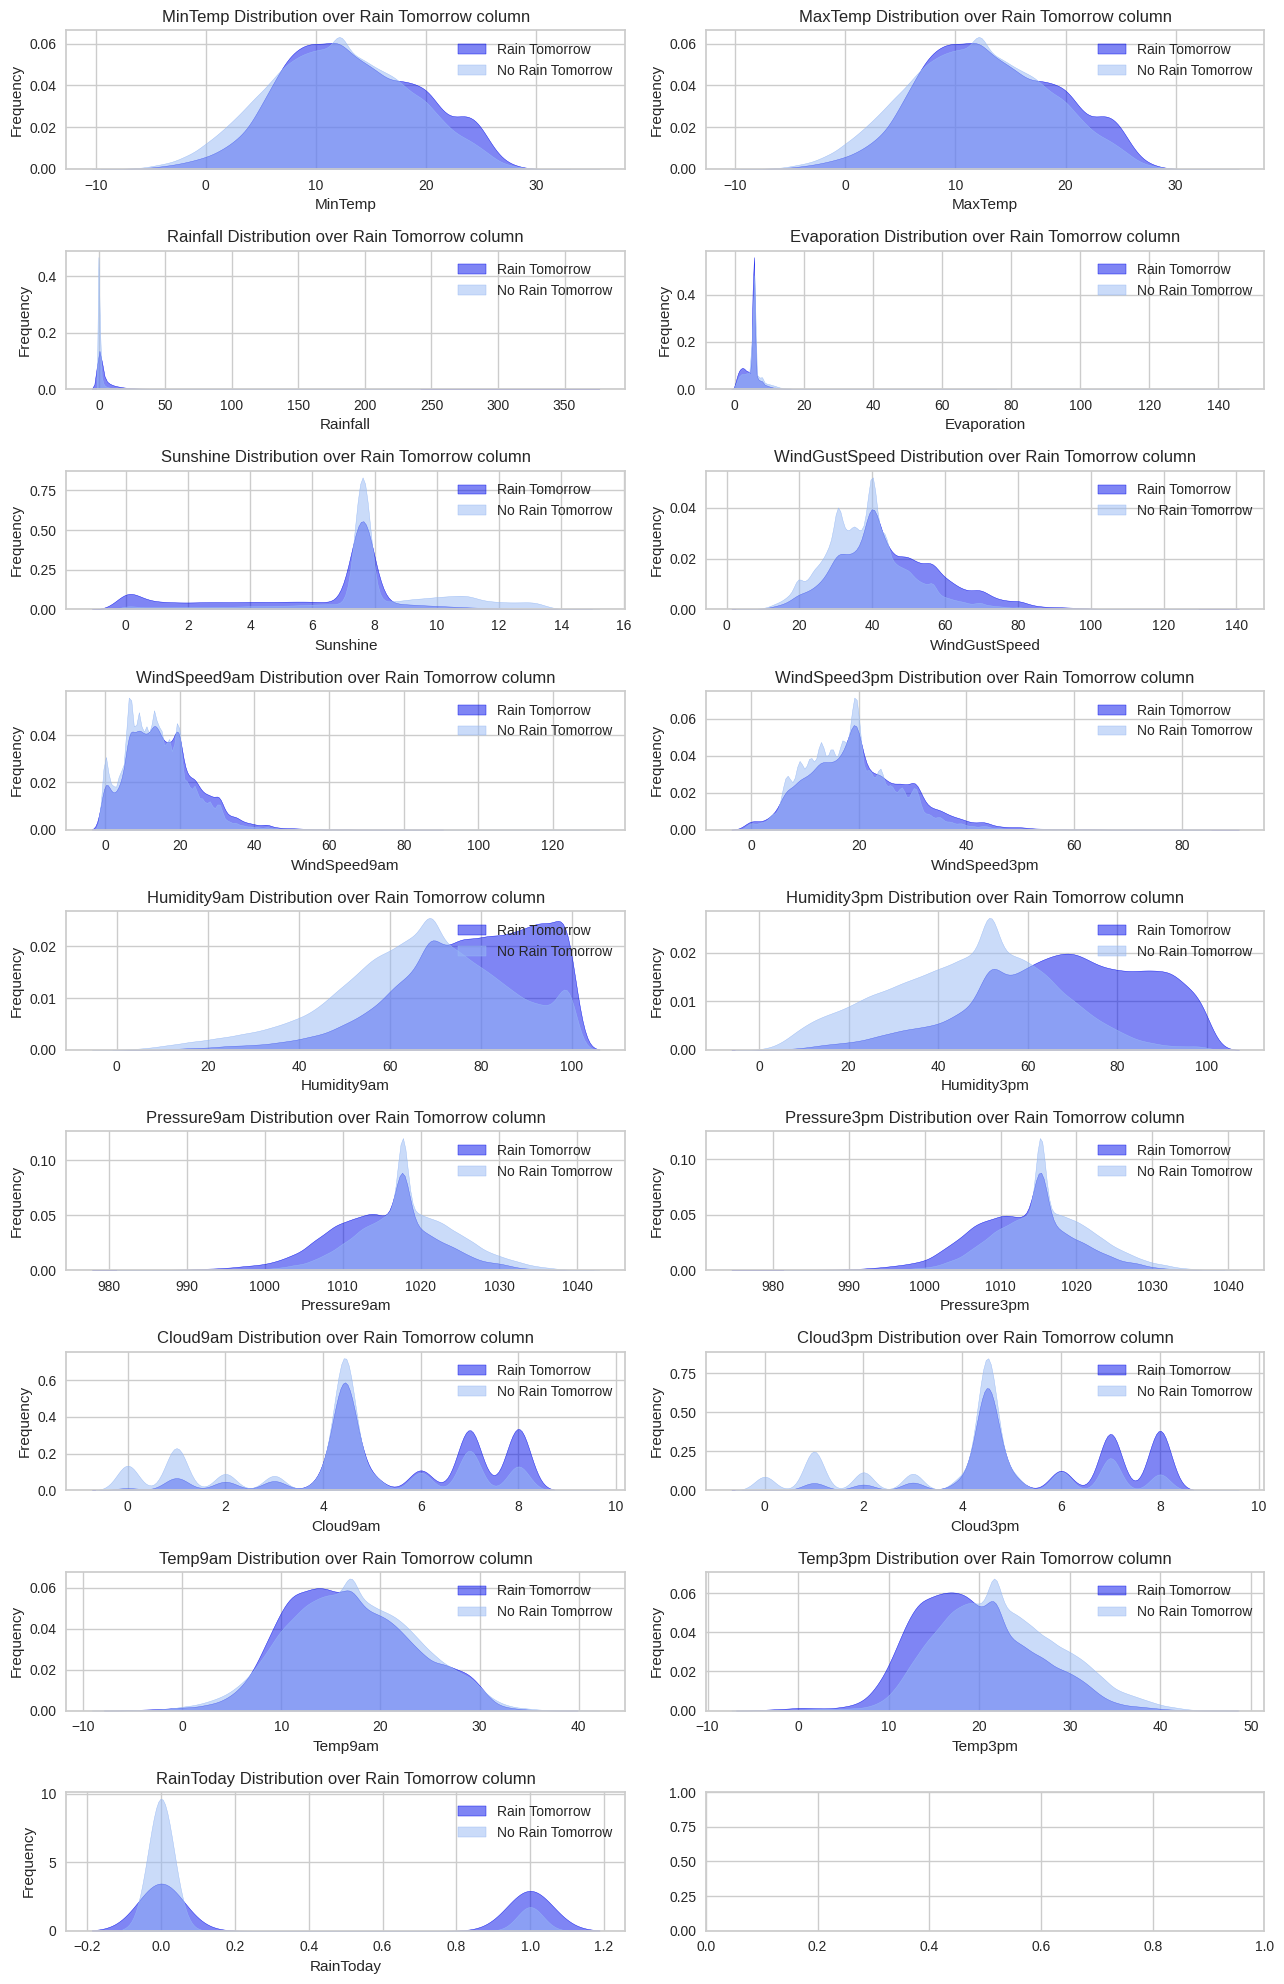

In [17]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
fig, axes = plt.subplots(nrows=len(df_num.columns) // 2, ncols=2, figsize=(13, 20))

for idx, column in enumerate(df_num.drop(columns = 'RainTomorrow')):
    row_idx = idx // 2
    col_idx = idx % 2

    sns.kdeplot(df[df["RainTomorrow"] == 1][column], alpha=0.5, fill=True, color="#000CEB", label="Rain Tomorrow", ax=axes[row_idx, col_idx])
    sns.kdeplot(df[df["RainTomorrow"] == 0][column], alpha=0.5, fill=True, color="#97B9F4", label="No Rain Tomorrow", ax=axes[row_idx, col_idx])

    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel("Frequency")
    axes[row_idx, col_idx].set_title(f"{column} Distribution over Rain Tomorrow column")
    axes[row_idx, col_idx].legend()

plt.tight_layout()
plt.show()

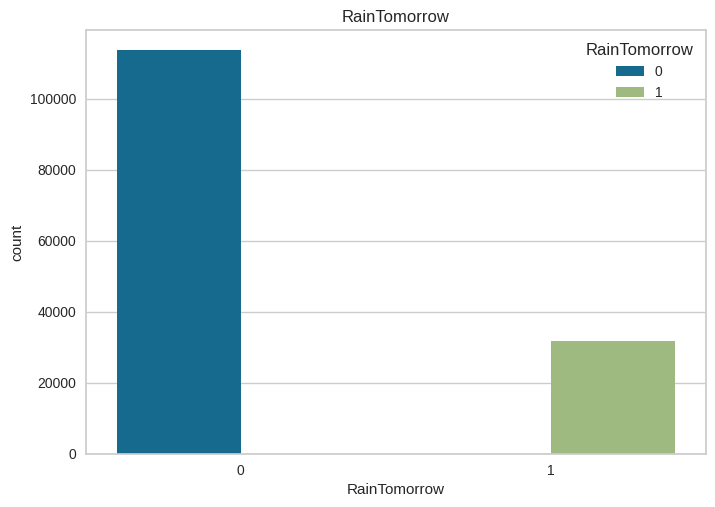

In [11]:
categorical_list = ["RainTomorrow"]
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric,hue = "RainTomorrow")
    plt.title(i)

In [12]:
ex.pie(df,names='RainTomorrow',title='Propotion Of Different Class',hole=0.33)

In [13]:
df["RainTomorrow"].value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

***Heatmap***

In [18]:
LE = LabelEncoder()
nume_list = ['Location','WindDir9am', 'WindDir3pm', 'WindGustDir']
for col in nume_list:
    df[col] = LE.fit_transform(df[col])
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,13.4,0.6,5.468232,7.611178,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2008-12-02,2,7.4,7.4,0.0,5.468232,7.611178,14,44.0,6,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2008-12-03,2,12.9,12.9,0.0,5.468232,7.611178,15,46.0,13,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2008-12-04,2,9.2,9.2,0.0,5.468232,7.611178,4,24.0,9,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2008-12-05,2,17.5,17.5,1.0,5.468232,7.611178,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
5,2008-12-06,2,14.6,14.6,0.2,5.468232,7.611178,14,56.0,13,...,55.0,23.0,1009.2,1005.4,4.447461,4.50993,20.6,28.9,0,0
6,2008-12-07,2,14.3,14.3,0.0,5.468232,7.611178,13,50.0,12,...,49.0,19.0,1009.6,1008.2,1.000000,4.50993,18.1,24.6,0,0
7,2008-12-08,2,7.7,7.7,0.0,5.468232,7.611178,13,35.0,10,...,48.0,19.0,1013.4,1010.1,4.447461,4.50993,16.3,25.5,0,0
8,2008-12-09,2,9.7,9.7,0.0,5.468232,7.611178,6,80.0,9,...,42.0,9.0,1008.9,1003.6,4.447461,4.50993,18.3,30.2,0,1
9,2008-12-10,2,13.1,13.1,1.4,5.468232,7.611178,13,28.0,8,...,58.0,27.0,1007.0,1005.7,4.447461,4.50993,20.1,28.2,1,0


In [19]:
df = df.drop("Date", axis = 1)

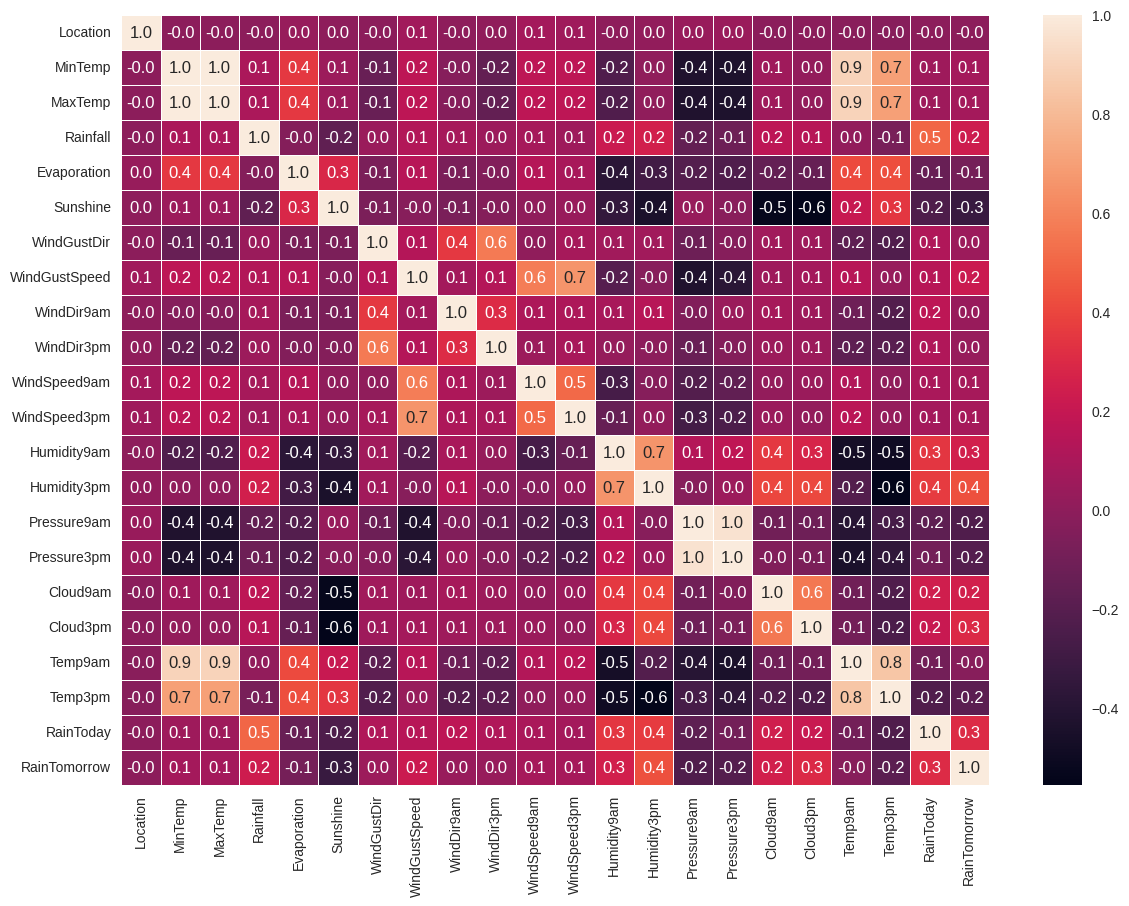

In [20]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

In [21]:
corr = df.corr()
corr["RainTomorrow"].sort_values()

Sunshine        -0.321533
Pressure9am     -0.230975
Pressure3pm     -0.211977
Temp3pm         -0.187806
Evaporation     -0.088288
Temp9am         -0.025555
Location        -0.005498
WindDir3pm       0.028890
WindDir9am       0.035341
WindGustDir      0.048774
MinTemp          0.082173
MaxTemp          0.082173
WindSpeed3pm     0.084207
WindSpeed9am     0.086661
WindGustSpeed    0.220442
Rainfall         0.233900
Cloud9am         0.249978
Humidity9am      0.251470
Cloud3pm         0.298050
RainToday        0.305744
Humidity3pm      0.433179
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

***Train Test Split***

In [22]:
x = df.drop(["RainTomorrow"], axis = 1)
y = df.loc[:,"RainTomorrow"].values

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

***Balancing***

In [26]:
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 113583, 1: 113583})
Resampled dataset shape Counter({0: 113583, 1: 113583})


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

***Detect Outliner***

In [28]:
# outlier detection
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df)

In [29]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold = np.quantile(x_score , .10)
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()
threshold

-1.1507712660778282

In [ ]:
len(outlier_index)

14546

In [30]:
df.drop(outlier_index, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130914 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       130914 non-null  int64  
 1   MinTemp        130914 non-null  float64
 2   MaxTemp        130914 non-null  float64
 3   Rainfall       130914 non-null  float64
 4   Evaporation    130914 non-null  float64
 5   Sunshine       130914 non-null  float64
 6   WindGustDir    130914 non-null  int64  
 7   WindGustSpeed  130914 non-null  float64
 8   WindDir9am     130914 non-null  int64  
 9   WindDir3pm     130914 non-null  int64  
 10  WindSpeed9am   130914 non-null  float64
 11  WindSpeed3pm   130914 non-null  float64
 12  Humidity9am    130914 non-null  float64
 13  Humidity3pm    130914 non-null  float64
 14  Pressure9am    130914 non-null  float64
 15  Pressure3pm    130914 non-null  float64
 16  Cloud9am       130914 non-null  float64
 17  Cloud3pm       130914 non-nul

***Decision Tree***

In [ ]:
#Find the best max-depth for DT algorithm
# Define a range of max_depth values to iterate over
max_depth_values = range(1, 30)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth = None
best_score = 0.0

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    # Fit the model to the training data
    clf.fit(x_train, y_train)
    # Evaluate the model on the test data
    test_score = clf.score(x_test, y_test)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# Print the best max depth and corresponding score
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Max Depth = 1: Test Score = 0.7179155331343599
Max Depth = 2: Test Score = 0.7285685357844044
Max Depth = 3: Test Score = 0.7370028965602247
Max Depth = 4: Test Score = 0.7628078145497126
Max Depth = 5: Test Score = 0.7803016296452814
Max Depth = 6: Test Score = 0.782696354207936
Max Depth = 7: Test Score = 0.7958849475713795
Max Depth = 8: Test Score = 0.8019509961878099
Max Depth = 9: Test Score = 0.8090911492036661
Max Depth = 10: Test Score = 0.8146465580236479
Max Depth = 11: Test Score = 0.8206861942368137
Max Depth = 12: Test Score = 0.8259510666208851
Max Depth = 13: Test Score = 0.8275710273544457
Max Depth = 14: Test Score = 0.8332232816530643
Max Depth = 15: Test Score = 0.8333465395349656
Max Depth = 16: Test Score = 0.8341124992296383
Max Depth = 17: Test Score = 0.8345527059507144
Max Depth = 18: Test Score = 0.8331704568465351
Max Depth = 19: Test Score = 0.8322020020601675
Max Depth = 20: Test Score = 0.8303443296972258
Max Depth = 21: Test Score = 0.8299657519171003
Ma

In [ ]:
# Initialize the Decision Tree classifier
#dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier = DecisionTreeClassifier(max_depth=17, random_state=42)
# Train the model on the training set
dt_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy*100}%")
print("F1 score :",f1_score(y_test, y_pred,)*100, "%")

Decision Tree Accuracy: 83.45527059507144%
F1 score : 83.44638043727207 %


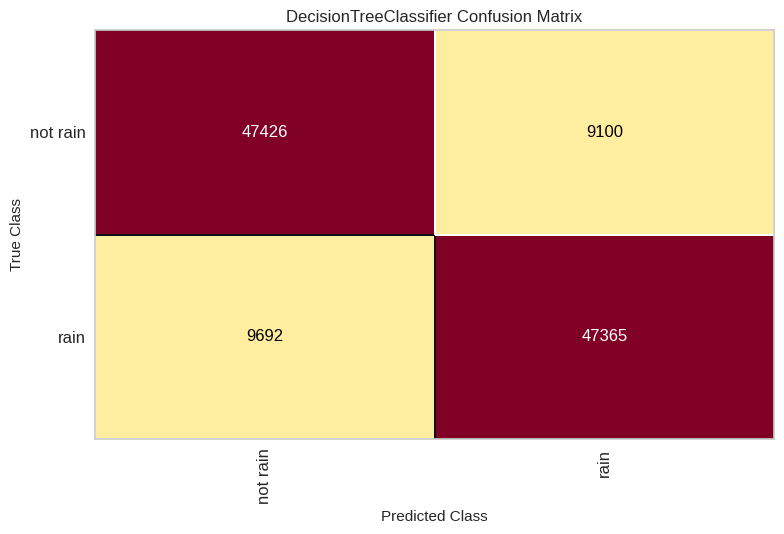

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
dt_cm = ConfusionMatrix(dt_classifier, classes=['not rain', 'rain'])

dt_cm.fit(x_train, y_train)
dt_cm.score(x_test, y_test)
dt_cm.show()

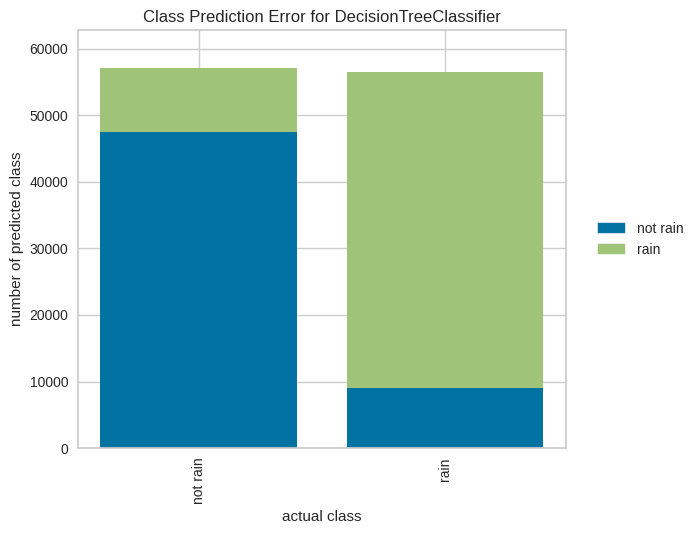

<Axes: title={'center': 'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
visualizer = ClassPredictionError(dt_classifier, classes=['not rain', 'rain'])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test.ravel())
visualizer.show()

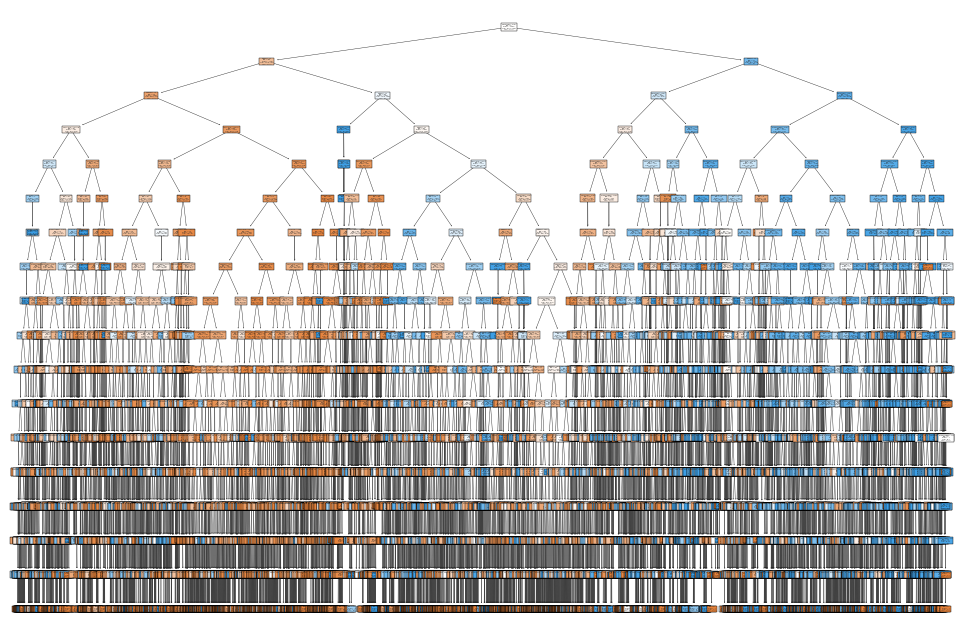

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=x.columns, class_names=['not rain', 'rain'])
plt.show()

***Random Forest***

In [ ]:
r_forest = RandomForestClassifier()
r_forest.fit(x_train,y_train)
predicted = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.892


In [ ]:
# Get the number of trees used
num_trees_used = r_forest.n_estimators

print('Number of trees used: %d' % num_trees_used)

Number of trees used: 100


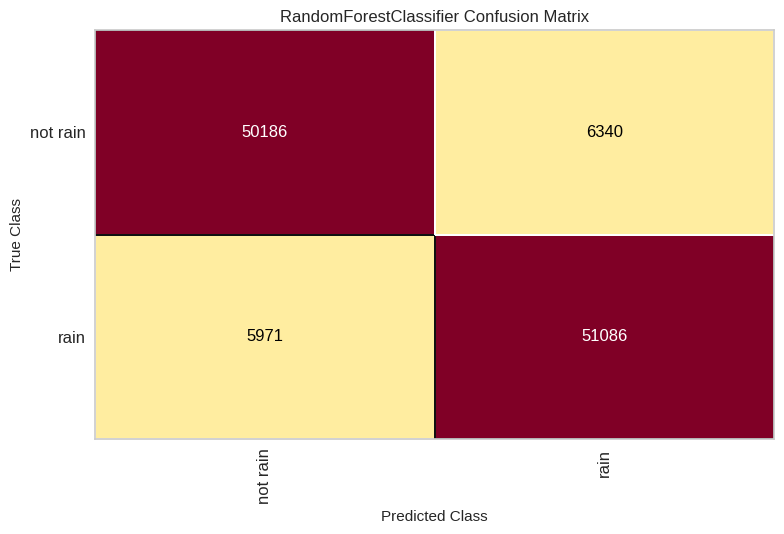

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
r_forest_cm = ConfusionMatrix(r_forest, classes=['not rain', 'rain'])

r_forest_cm.fit(x_train, y_train)
r_forest_cm.score(x_test, y_test)
r_forest_cm.show()

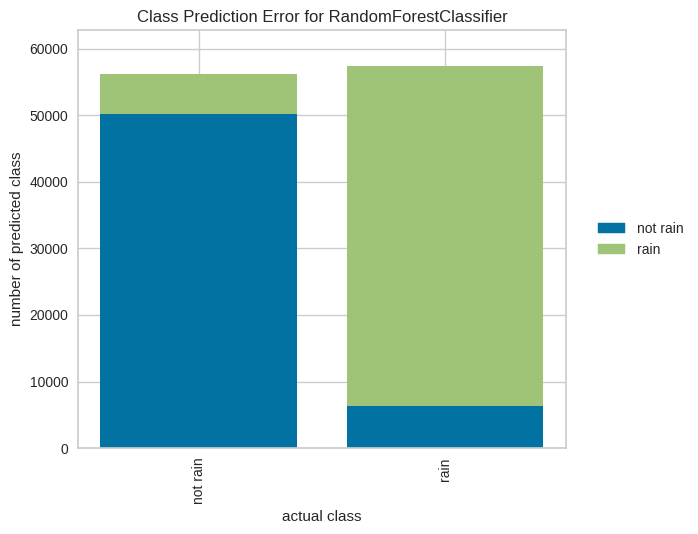

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
visualizer = ClassPredictionError(r_forest, classes=['not rain', 'rain'])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test.ravel())
visualizer.show()

***KNN***

In [31]:
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(x_train,y_train)
y_predicted_KNN = KNN.predict(x_test)
score = KNN.score(x_test, y_test)
KNN_score_ = np.mean(score)
print('Accuracy : %.3f' % (KNN_score_))

Accuracy : 0.874


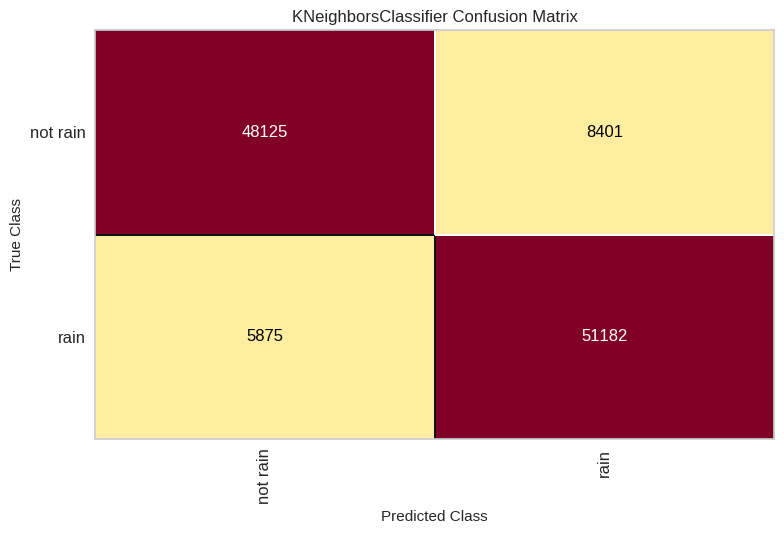

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [33]:
KNN_cm = ConfusionMatrix(KNN, classes=['not rain', 'rain'])

KNN_cm.fit(x_train, y_train)
KNN_cm.score(x_test, y_test)
KNN_cm.show()

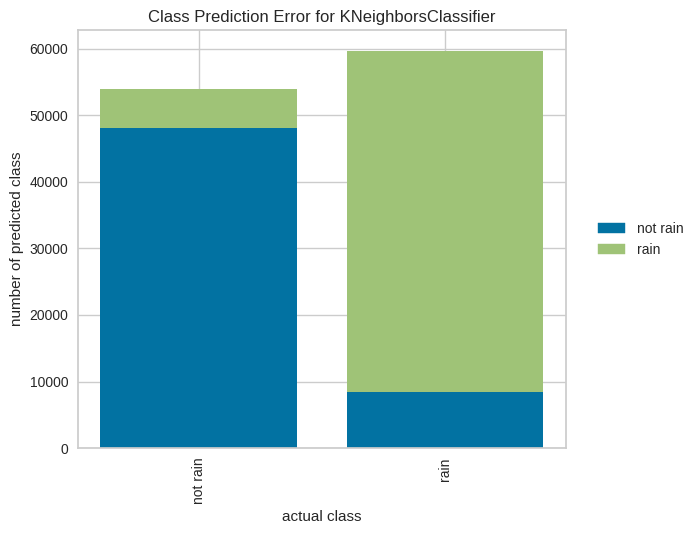

<Axes: title={'center': 'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [34]:
visualizer = ClassPredictionError(KNN, classes=['not rain', 'rain'])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test.ravel())
visualizer.show()

***Testing***

In [35]:
testdata = pd.read_csv('https://drive.google.com/uc?export=download&id=1jHLiEWIVcHFQzX28AMzyOWUA7y1h7cjs')
testdata.head(11)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,9.2,28.0,0.0,NaN,NaN,NE,24,SE,E,...,9,45,16,1017.6,1012.8,NaN,NaN,18.1,26.5,No
1,Albury,17.5,32.3,1.0,NaN,NaN,W,41,ENE,NW,...,20,82,33,1010.8,1006.0,7.0,8.0,17.8,29.7,No
2,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56,W,W,...,24,55,23,1009.2,1005.4,NaN,NaN,20.6,28.9,No
3,Albury,14.3,25.0,0.0,NaN,NaN,W,50,SW,W,...,24,49,19,1009.6,1008.2,1.0,NaN,18.1,24.6,No
4,Albury,7.7,26.7,0.0,NaN,NaN,W,35,SSE,W,...,17,48,19,1013.4,1010.1,NaN,NaN,16.3,25.5,No
5,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80,SE,NW,...,28,42,9,1008.9,1003.6,NaN,NaN,18.3,30.2,No
6,Albury,13.1,30.1,1.4,NaN,NaN,W,28,S,SSE,...,11,58,27,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes
7,Albury,13.4,30.4,0.0,NaN,NaN,N,30,SSE,ESE,...,6,48,22,1011.8,1008.7,NaN,NaN,20.4,28.8,No
8,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31,NE,ENE,...,13,89,91,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes
9,Albury,15.9,18.6,15.6,NaN,NaN,W,61,NNW,NNW,...,28,76,93,994.3,993.0,8.0,8.0,17.4,15.8,Yes


In [36]:
LE = LabelEncoder()
nume_list = ['Location','WindDir9am', 'WindDir3pm', 'WindGustDir']
for col in nume_list:
    testdata[col] = LE.fit_transform(testdata[col])

In [37]:
testdata['RainToday'] = testdata['RainToday'].map({'Yes': 1, 'No': 0})

In [38]:
testdata['Evaporation']=testdata['Evaporation'].fillna(df['Evaporation'].mean())
testdata['Sunshine']=testdata['Sunshine'].fillna(df['Sunshine'].mean())
testdata['Cloud9am']=testdata['Cloud9am'].fillna(df['Cloud9am'].mean())
testdata['Cloud3pm']=testdata['Cloud3pm'].fillna(df['Cloud3pm'].mean())

True Class: 0 0 0 0 0 1 0 1 1 1 0

In [ ]:
y_pred__2 = dt_classifier.predict(testdata)
print(y_pred__2)

[1 0 1 0 1 1 0 0 1 1 0]


In [ ]:
y_pred_2 = r_forest.predict(testdata)
print(y_pred_2)

[0 0 1 0 0 1 0 0 1 1 0]


In [39]:
y_pred2 = KNN.predict(testdata)
print(y_pred2)

[0 0 0 0 0 1 0 1 1 1 0]
